Практическая задача No 1        
Фамилия: *Смородина* Группа: *302* Дата: *20.03.2020*

**_Вводные данные_**

_Цель эксперимента_ : Определить зависимость скорости ферментативной реакции,
катализируемой лакказой, от концентрации субстрата, а также кинетические параметры
данной реакции (KM, Vm, k 2 ) (происхождение лакказы и название субстрата – см. в файле с
индивидуальным заданием).

_Катализируемая ферментом реакция_ :
O 2 + 4 DH → 2 H 2 O + 4 Dox,
где DH – восстановленная форма донора электронов, Dox – окисленная форма донора
электронов.

*Фермент:* лакказа из гриба Trametes hirsuta.  

*Субстрат, концентрацию которого варьируют:* донор электронов ABTS (2,2’-азино-
бис(3-этилбензтиазолин-6-сульфоната) диаммониевая соль).

_Условия проведения эксперимента_ : 1,5 мкл белка (лакказа T.h., молекулярная масса 65 кДа) концентрацией 0,5 мг/мл добавляли в полярографическую ячейку объемом 1,25 мл, содержащую 100 мМ Na-Ac буферный раствор рН 4,5 и донор электронов ABTS в указанных концентрациях. Температура проведения реакции 25°С, концентрация
кислорода в ячейке 270 мкМ. В результате измерения и преобразования данных получали зависимость концентрации расходуемого кислорода от времени протекания реакции.    


In [1]:
from collections import defaultdict 
import pandas as pd
import numpy as np

In [2]:
C_enz = ((0.5*1.5e-3/(65*1e6))/(1.25*1e-3)) * 1e6
print(f'Концентрация фермента в реакционной ячейке (мкМ): {round(C_enz, 5)}')
print(f'Концентрация фермента в реакционной ячейке (М): {C_enz / 1e6}')

Концентрация фермента в реакционной ячейке (мкМ): 0.00923
Концентрация фермента в реакционной ячейке (М): 9.23076923076923e-09


**_Задания_**

1.Определить концентрацию фермента (М, моль/л) в реакционной ячейке из условий
проведения эксперимента. Заполнить таблицу 1.


2.Рассчитать скорость ферментативной реакции в зависимости от концентрации субстрата:
а) с помощью линейной аппроксимации первых секунд реакции;
б) с помощью аппроксимации функцией ExpAssoc

$$y(x)=y_0+A_1\times4(1-e^{x/t_1})+A_2\times4(1-e^{x/t_2})$$

Если скорость определена не по тому субстрату (или образуемому из него продукту),
концентрация которого варьируется по ходу эксперимента – домножить/разделить
полученное значение на нужный стехиометрический коэффициент (см. уравнение
реакции). Заполнить таблицу 2.


3.Определить значения кинетических параметров (KM, Vm, k 2 ) на основании рассчитанных
Вами значений скоростей в предположении, что справедлива простейшая схема:
а) в прямых координатах;    
б) в координатах Хейнса;    
в) в координатах Иди-Хофсти;    
г) в координатах Лайнуивера-Берка.    
Заполнить таблицу 3.   


4.Сравнить значения кинетических параметров, определённых различными способами, и
сделать выводы.

In [3]:
xls = '2020_практикум-1_302_Смородина.xls'

df = pd.read_excel(xls)
df = df.replace('--', np.nan) 
df = df.loc[1:]

In [4]:
df.head(10)

,"ABTS, 7 мкМ",Unnamed: 1,"ABTS, 10 мкМ",Unnamed: 3,"ABTS, 11,5 мкМ",Unnamed: 5,"ABTS, 15 мкМ",Unnamed: 7,"ABTS, 24 мкМ",Unnamed: 9,"ABTS, 33 мкМ",Unnamed: 11,"ABTS, 50 мкМ",Unnamed: 13,"ABTS, 100 мкМ",Unnamed: 15,"ABTS, 200 мкМ",Unnamed: 17,"ABTS, 500 мкМ",Unnamed: 19
1,0,-0.00539,0,-0.10414,0,0.00309,0,0.00482,0,0.00321,0,0.00174,0,-0.00344,0,0.00162,0,0.000499732,0,-0.000272705
2,0.25,-0.13522,0.187,-0.01704,0.25,0.39697,0.188,0.07179,0.25,0.06314,0.188,-0.08255,0.25,-0.43274,0.187,0.02695,0.187,-0.17024,0.25,0.25798
3,0.437,0.01784,0.437,-0.0202,0.5,0.23845,0.438,0.09275,0.437,0.42474,0.438,0.14203,0.5,0.07041,0.437,0.45392,0.437,0.35591,0.438,0.63744
4,0.687,0.26791,0.625,0.51217,0.687,0.24885,0.625,0.24044,0.687,0.44283,0.625,0.34476,0.687,0.07636,0.687,0.98718,0.625,0.85406,0.688,0.98804
5,0.937,0.34297,0.875,0.53341,0.937,0.24064,0.875,0.22188,0.875,0.51364,0.875,0.52953,0.937,0.14609,0.875,0.86526,0.875,0.6139,0.938,1.10136
6,1.125,0.21338,1.125,1.1566,1.125,0.52705,1.125,0.64361,1.125,0.3543,1.125,1.11349,1.125,0.10529,1.156,0.87182,1.062,0.85688,1.125,0.80889
7,1.375,0.34863,1.312,0.81871,1.375,0.52267,1.313,0.51496,1.312,0.54287,1.313,0.7456,1.375,0.50775,1.359,1.01364,1.312,0.89917,1.375,1.69121
8,1.562,-0.01837,1.5,0.86281,1.625,0.51069,1.563,0.47066,1.562,0.90088,1.563,0.49808,1.562,0.61406,1.562,1.15994,1.562,1.66454,1.563,1.91199
9,1.812,0.14273,1.75,0.88577,1.812,0.68806,1.75,0.46766,1.75,1.17038,1.75,0.88708,1.812,1.03295,1.75,1.65682,1.75,1.42255,1.813,2.1555
10,2,0.32306,2,0.64434,2.031,0.29817,2,0.55888,2,1.26953,1.953,0.87335,2,1.07359,2,1.68584,2,1.74305,2.063,1.79375


In [5]:
K = [np.float(col.split()[1].replace(',','.')) for col in df if col.startswith('ABTS')]
t = [col for col in df if col.startswith('ABTS')]
s = [col for col in df if col.startswith('Unnamed')]
T = df[t].to_numpy()
S = df[s].to_numpy()

d = defaultdict(dict)

for i in enumerate(K):
    for j in zip(T, S):
        d[i[1]].update({j[0][i[0]]:j[1][i[0]]})

In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


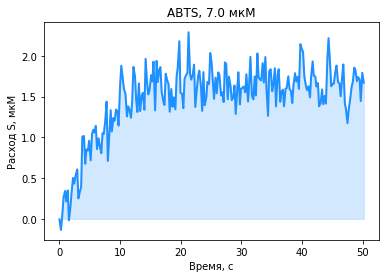

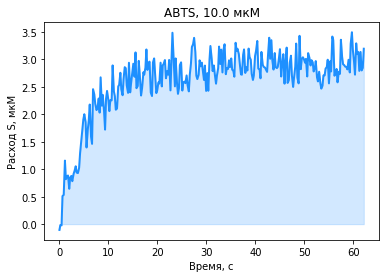

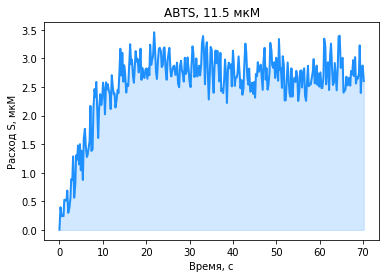

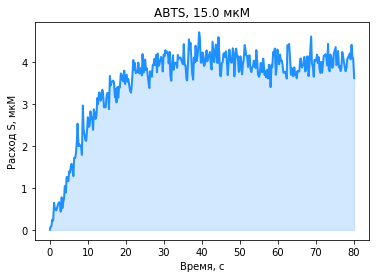

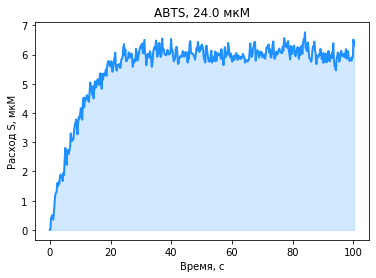

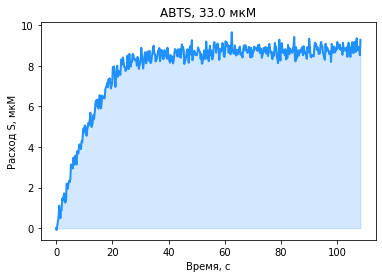

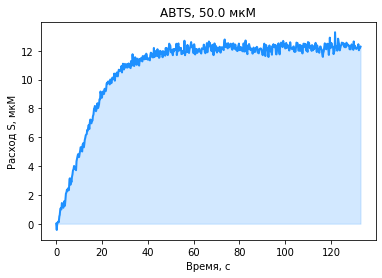

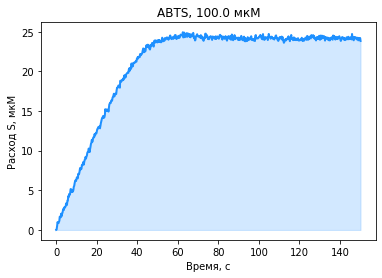

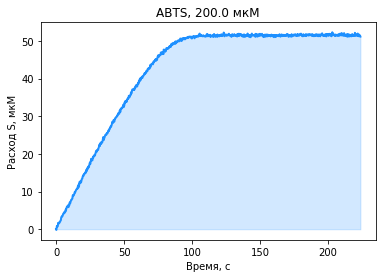

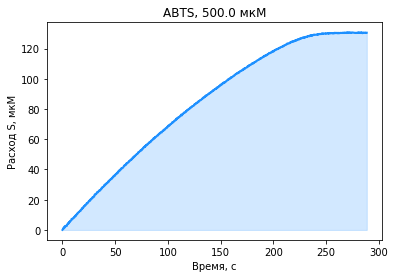

In [6]:
import matplotlib.pyplot as plt

for i in d:
    plt.title(f'ABTS, {i} мкМ')
    plt.xlabel('Время, с')
    plt.ylabel('Расход S, мкМ')
    plt.plot(list(d[i].keys()), list(d[i].values()), linewidth=2, color = 'dodgerblue')
    plt.fill_between(list(d[i].keys()), list(d[i].values()), alpha = 0.2, color = 'dodgerblue')
    plt.show()

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

intervals = {x: list() for x in d.keys()}
linear_results = {x: 0 for x in d.keys()}

intervals[7.0] = 0, 6
intervals[10.0] = 0, 5
intervals[11.5] = 0, 10
intervals[15.0] = 0, 8
intervals[24.0] = 0, 7
intervals[33.0] = 0, 9
intervals[50.0] = 0, 15
intervals[100.0] = 0, 20
intervals[200.0] = 0, 40
intervals[500.0] = 0, 45

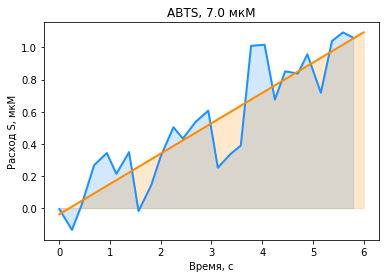

Диапазон аппроксимации, сек: 0-6 (начало-конец);
Cкорость: 0.75433 мкМ/сек;
R-squared: 0.798


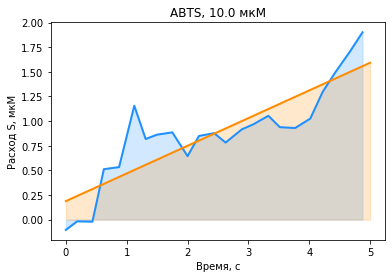

Диапазон аппроксимации, сек: 0-5 (начало-конец);
Cкорость: 1.12401 мкМ/сек;
R-squared: 0.745


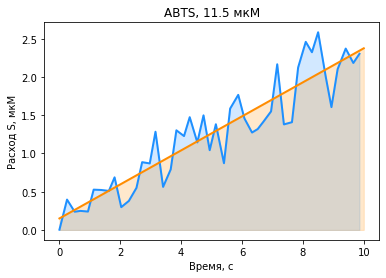

Диапазон аппроксимации, сек: 0-10 (начало-конец);
Cкорость: 0.89066 мкМ/сек;
R-squared: 0.852


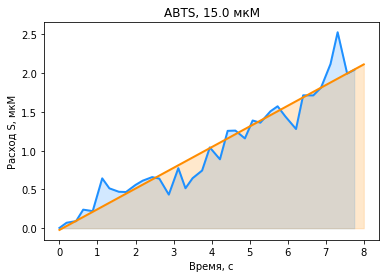

Диапазон аппроксимации, сек: 0-8 (начало-конец);
Cкорость: 1.06624 мкМ/сек;
R-squared: 0.92


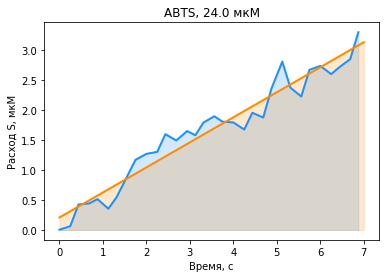

Диапазон аппроксимации, сек: 0-7 (начало-конец);
Cкорость: 1.67241 мкМ/сек;
R-squared: 0.945


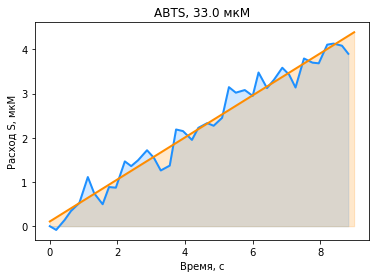

Диапазон аппроксимации, сек: 0-9 (начало-конец);
Cкорость: 1.90198 мкМ/сек;
R-squared: 0.965


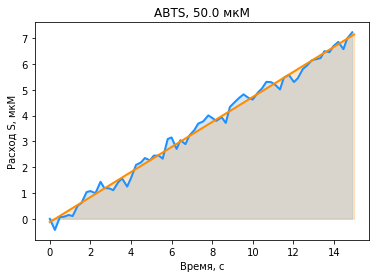

Диапазон аппроксимации, сек: 0-15 (начало-конец);
Cкорость: 1.94018 мкМ/сек;
R-squared: 0.99


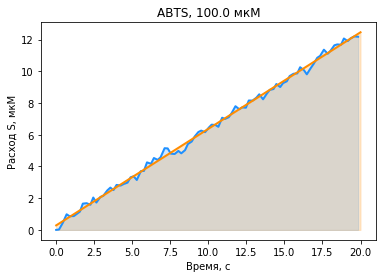

Диапазон аппроксимации, сек: 0-20 (начало-конец);
Cкорость: 2.43596 мкМ/сек;
R-squared: 0.997


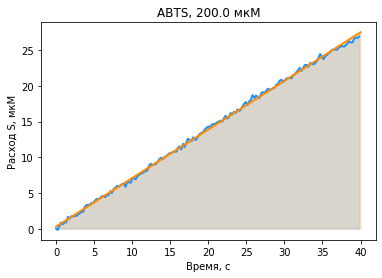

Диапазон аппроксимации, сек: 0-40 (начало-конец);
Cкорость: 2.72072 мкМ/сек;
R-squared: 0.999


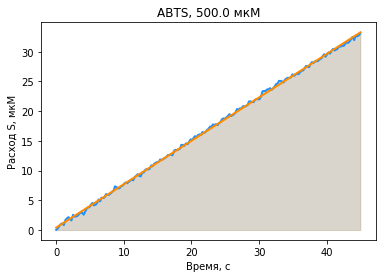

Диапазон аппроксимации, сек: 0-45 (начало-конец);
Cкорость: 2.92484 мкМ/сек;
R-squared: 0.999


In [8]:
# Linear Regression: https://proglib.io/p/linear-regression/

plot_k = 0
stoichiometric = 4

for i in d:
    x = list(x for x in d[i].keys() if x < intervals[i][1] and x >= intervals[i][0])
    x = np.array(x).reshape((-1, 1)) 
    y = np.array(list(y[1] for y in enumerate(d[i].values()) if list(d[i].keys())[y[0]] >= intervals[i][0] and list(d[i].keys())[y[0]] < intervals[i][1]))

    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    k = model.coef_[0]
    b = model.intercept_
    linear_results[i] = k * stoichiometric
    if plot_k == 0 or i == plot_k:
        plt.title(f'ABTS, {i} мкМ')
        plt.xlabel('Время, с')
        plt.ylabel('Расход S, мкМ')

        x_lin = np.linspace(intervals[i][0], intervals[i][1], 100)
        y_lin = k * x_lin + b
        plt.plot(x, y, linewidth=2, color = 'dodgerblue')
        plt.plot(x_lin, y_lin, linewidth=2, linestyle='-', color = 'darkorange')
        x = np.array(x).reshape((-1))
        plt.fill_between(x, 0, y, alpha = 0.2, color = 'dodgerblue')
        plt.fill_between(x_lin, 0, y_lin, alpha = 0.2, color = 'darkorange')
        plt.show()
        print(f'Диапазон аппроксимации, сек: {intervals[i][0]}-{intervals[i][1]} (начало-конец);\nCкорость: {round(linear_results[i], 5)} мкМ/сек;\nR-squared: {round(r_sq, 3)}')

In [9]:
def get_results(d, intervals, linear_results, substrate=True, a_range=True, velocity=True):
    
    data = []
    a = ''
    b = ''
    c = ''
    
    if substrate:
        a = 'Субстрат (мкМ)'
        data.append([f'{i}' for i in d])
    if a_range: 
        b = 'Диапазон (сек)'
        data.append([f'{intervals[i][0]}-{intervals[i][1]}' for i in d])        
    if velocity:   
        c = 'Скорость (мкМ/сек)'
        data.append([f'{round(linear_results[i], 5)}' for i in d])
      
    print("{:>}  {:>}  {:>}\n".format(a, b, c))
    data = list(map(list, zip(*data)))
    col_width = max(len(word) for row in data for word in row) + 10  # padding
    for row in data:
        print (''.join(word.ljust(col_width) for word in row))

In [10]:
get_results(d, intervals, linear_results, substrate=True, a_range=True, velocity=True)

Субстрат (мкМ)  Диапазон (сек)  Скорость (мкМ/сек)

7.0              0-6              0.75433          
10.0             0-5              1.12401          
11.5             0-10             0.89066          
15.0             0-8              1.06624          
24.0             0-7              1.67241          
33.0             0-9              1.90198          
50.0             0-15             1.94018          
100.0            0-20             2.43596          
200.0            0-40             2.72072          
500.0            0-45             2.92484          


In [11]:
from scipy.optimize import curve_fit

def ExpAssoc(x, y0, A1, t1, A2, t2):
    return y0 + A1 * (1 - np.exp(-x/ t1)) + A2 * (1 - np.exp(-x/ t2))

def get_velocity(y0, A1, t1, A2, t2):
    return A1/t1 + A2/t2

def get_r_sq(f, x, y, params):
    residuals = y - f(x, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

In [12]:
intervals = {x: [0, 60] for x in d.keys()}
exp_assoc_results = {x: 0 for x in d.keys()}

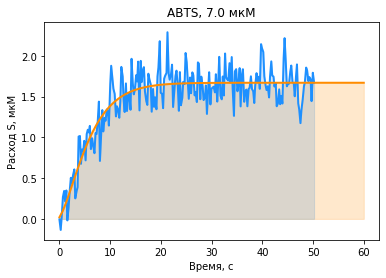

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 0.36976 мкМ/сек;
R-squared: 0.8


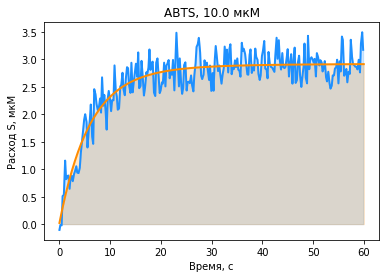

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 1.88959 мкМ/сек;
R-squared: 0.85


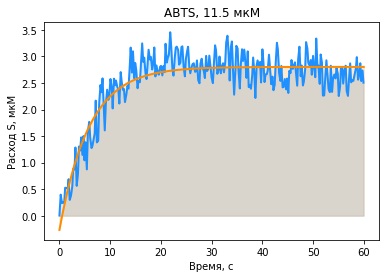

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.10419 мкМ/сек;
R-squared: 0.83


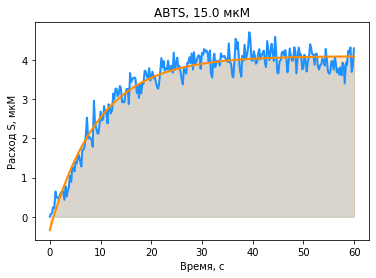

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 1.84089 мкМ/сек;
R-squared: 0.95


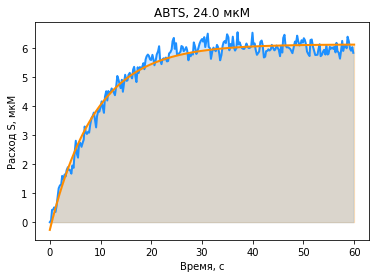

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.86586 мкМ/сек;
R-squared: 0.98


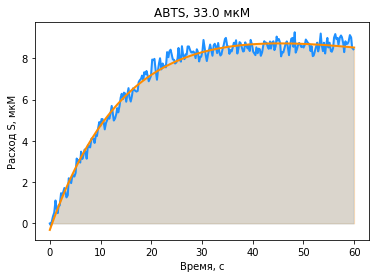

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.8055 мкМ/сек;
R-squared: 0.99


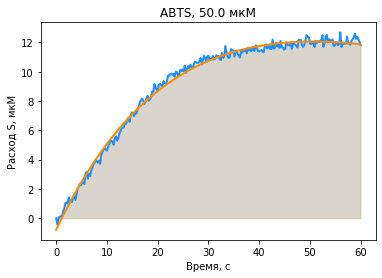

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.92987 мкМ/сек;
R-squared: 0.99


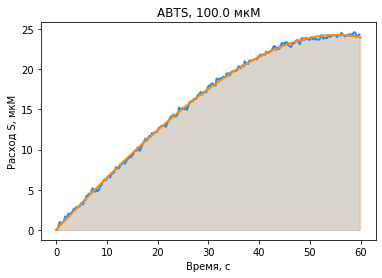

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.6766 мкМ/сек;
R-squared: 1.0


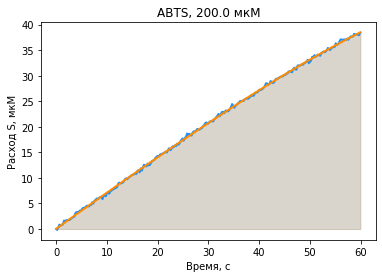

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 2.84528 мкМ/сек;
R-squared: 1.0


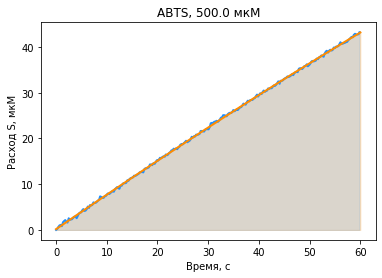

Диапазон аппроксимации, сек: 0-60 (начало-конец);
Cкорость: 3.04005 мкМ/сек;
R-squared: 1.0


In [13]:
plot_k = 0
stoichiometric = 4

for i in d:
    x = np.array(list(x for x in d[i].keys() if x < intervals[i][1] and x >= intervals[i][0])) 
    y = np.array(list(y[1] for y in enumerate(d[i].values()) if list(d[i].keys())[y[0]] >= intervals[i][0] and list(d[i].keys())[y[0]] < intervals[i][1]))

    params = curve_fit(ExpAssoc, x, y, maxfev=15000)[0]
    exp_assoc_results[i] = get_velocity(*params) * stoichiometric
    r_sq = get_r_sq(ExpAssoc, x, y, params)

    if plot_k == 0 or i == plot_k:
        plt.title(f'ABTS, {i} мкМ')
        plt.xlabel('Время, с')
        plt.ylabel('Расход S, мкМ')

        x_exp = np.linspace(intervals[i][0], intervals[i][1], 100)
        y_exp = ExpAssoc(x_exp, *params)
        plt.plot(x, y, linewidth=2, color = 'dodgerblue')
        plt.plot(x_exp, y_exp, linewidth=2, linestyle='-', color = 'darkorange')
        x = np.array(x).reshape((-1))
        plt.fill_between(x, 0, y, alpha = 0.2, color = 'dodgerblue')
        plt.fill_between(x_exp, 0, y_exp, alpha = 0.2, color = 'darkorange')
        plt.show()
        print(f'Диапазон аппроксимации, сек: {intervals[i][0]}-{intervals[i][1]} (начало-конец);\nCкорость: {round(exp_assoc_results[i], 5)} мкМ/сек;\nR-squared: {round(r_sq, 2)}')

In [14]:
get_results(d, intervals, exp_assoc_results, substrate=True, a_range=True, velocity=True)

Субстрат (мкМ)  Диапазон (сек)  Скорость (мкМ/сек)

7.0              0-60             0.36976          
10.0             0-60             1.88959          
11.5             0-60             2.10419          
15.0             0-60             1.84089          
24.0             0-60             2.86586          
33.0             0-60             2.8055           
50.0             0-60             2.92987          
100.0            0-60             2.6766           
200.0            0-60             2.84528          
500.0            0-60             3.04005          


In [15]:
def Hyperbl(x, Vm, Km):
    return Vm * x / (Km + x)

def get_k2(Vm, E0):
    return np.float128(Vm / E0)

def result(coords, Vm, Km, r_sq):
    print(coords)
    k2 = get_k2(np.float128(Vm), np.float128(C_enz))
    print(f'Km: {round(Km, 5)}, мкМ;\nVm: {round(Vm, 5)}, мкМ/сек;\nk2: {np.format_float_scientific(k2, precision=2)}, 1/сек;\nR-squared: {round(r_sq, 2)}')
    
    
def plot_coords(x, y, title, direct=True, inverse=True, coord=None):
 
    if direct:
        plt.title(f'{title}')
        plt.xlabel('ABTS, мкМ')
        plt.ylabel('Скорость, мкМ/сек')
        
        params = curve_fit(Hyperbl, x, y, maxfev=15000)[0]
        Vm = params[0]
        Km = params[1]
        r_sq = get_r_sq(Hyperbl, x, y, params)
    
        x_hyp = np.linspace(x[0], x[-1], 100)
        y_hyp = Hyperbl(x_hyp, *params)
         
        plt.plot(x, y, 'o', alpha=0.4, color='forestgreen')
        plt.plot(x_hyp, y_hyp, linewidth=2, color = 'b')
    
    if inverse:
                
        model = LinearRegression()
        model.fit(x, y)
        r_sq = model.score(x, y)
        k2 = model.coef_[0]
        b = model.intercept_
        
        x_lin = np.linspace(min(x), max(x), 100)
        y_lin = k2 * x_lin + b
        
        plt.title(f'{title}')        
        plt.plot(x, y, 'o', alpha=0.7, color='forestgreen')
        plt.plot(x_lin, y_lin, color='b')
        
        if coord == 'Hanes':
            Vm = 1/k2
            Km = b/k2
            

            plt.xlabel('S')
            plt.ylabel('S / V')
            
        if coord == 'Eadie–Hofstee':    
            Vm = b
            Km = -k2
            
            plt.xlabel("V / S")
            plt.ylabel("V")

        if coord == 'Lineweaver–Burk':  
            Vm = 1 / b
            Km = k2 / b
            
            plt.xlabel("1 / S")
            plt.ylabel("1 / V")
        
    plt.show()
    result(f'{title}', Vm, Km, r_sq)

In [16]:
linear_results

{7.0: 0.7543334729525066,
 10.0: 1.1240064106648344,
 11.5: 0.8906591759514375,
 15.0: 1.066239374372035,
 24.0: 1.6724113893098,
 33.0: 1.901980357709172,
 50.0: 1.9401837000038125,
 100.0: 2.435962915646071,
 200.0: 2.7207225522429943,
 500.0: 2.9248438401343377}

In [17]:
x_dir = np.array(list(linear_results.keys()))
y_dir = np.array(list(linear_results.values()))

In [18]:
print(x_dir)
print(y_dir)

[  7.   10.   11.5  15.   24.   33.   50.  100.  200.  500. ]
[0.75433347 1.12400641 0.89065918 1.06623937 1.67241139 1.90198036
 1.9401837  2.43596292 2.72072255 2.92484384]


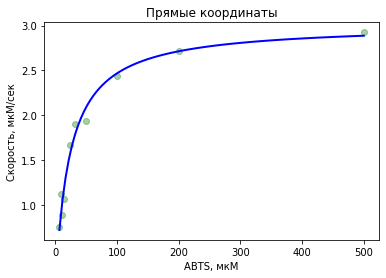

Прямые координаты
Km: 22.28023, мкМ;
Vm: 3.01451, мкМ/сек;
k2: 3.27e+02, 1/сек;
R-squared: 0.98


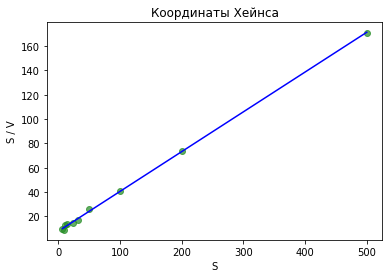

Координаты Хейнса
Km: 23.60713, мкМ;
Vm: 3.05708, мкМ/сек;
k2: 3.31e+02, 1/сек;
R-squared: 1.0


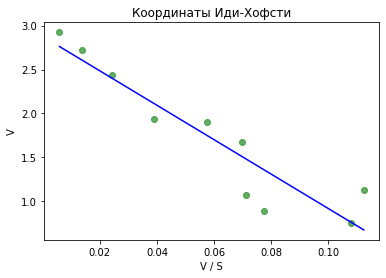

Координаты Иди-Хофсти
Km: 19.59993, мкМ;
Vm: 2.87725, мкМ/сек;
k2: 3.12e+02, 1/сек;
R-squared: 0.87


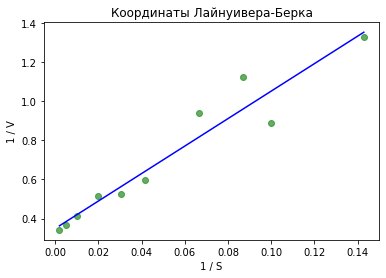

Координаты Лайнуивера-Берка
Km: 20.11932, мкМ;
Vm: 2.86697, мкМ/сек;
k2: 3.11e+02, 1/сек;
R-squared: 0.93


In [19]:
plot_coords(x_dir, y_dir, 'Прямые координаты', direct=True, inverse=False)

titles = ['Координаты Хейнса', 'Координаты Иди-Хофсти', 'Координаты Лайнуивера-Берка']
types = ['Hanes', 'Eadie–Hofstee', 'Lineweaver–Burk']
xy = [(x_dir.reshape((-1,1)), x_dir / y_dir), ((y_dir / x_dir).reshape((-1,1)), y_dir), ((1 / x_dir).reshape((-1,1)), 1 / y_dir)]
for i, j, z in zip(titles, types, xy):
    plot_coords(z[0], z[1], i, direct=False, inverse=True, coord=j)
    

In [20]:
x_dir = np.array(list(exp_assoc_results.keys()))
y_dir = np.array(list(exp_assoc_results.values()))

In [21]:
print(x_dir)
print(y_dir)

[  7.   10.   11.5  15.   24.   33.   50.  100.  200.  500. ]
[0.36975836 1.88958617 2.1041917  1.84089409 2.86586178 2.80549783
 2.92986638 2.6765965  2.8452841  3.04004653]


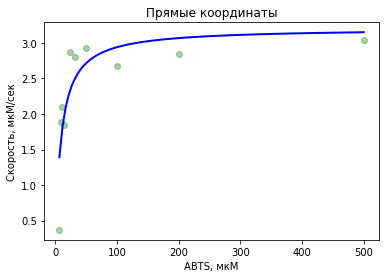

Прямые координаты
Km: 9.12739, мкМ;
Vm: 3.20633, мкМ/сек;
k2: 3.47e+02, 1/сек;
R-squared: 0.71


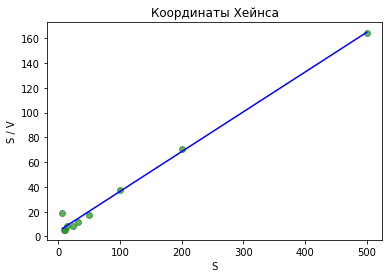

Координаты Хейнса
Km: 13.02776, мкМ;
Vm: 3.11317, мкМ/сек;
k2: 3.37e+02, 1/сек;
R-squared: 0.99


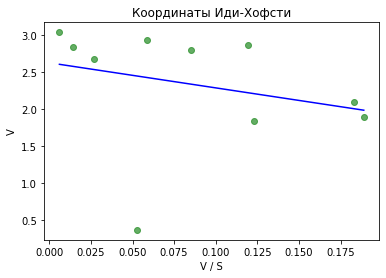

Координаты Иди-Хофсти
Km: 3.38889, мкМ;
Vm: 2.62738, мкМ/сек;
k2: 2.85e+02, 1/сек;
R-squared: 0.07


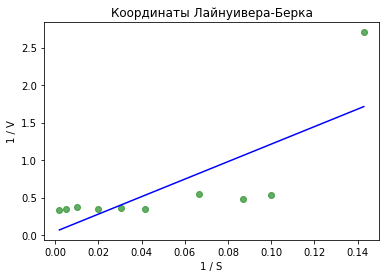

Координаты Лайнуивера-Берка
Km: 257.686, мкМ;
Vm: 22.07632, мкМ/сек;
k2: 2.39e+03, 1/сек;
R-squared: 0.57


In [22]:
plot_coords(x_dir, y_dir, 'Прямые координаты', direct=True, inverse=False)

titles = ['Координаты Хейнса', 'Координаты Иди-Хофсти', 'Координаты Лайнуивера-Берка']
types = ['Hanes', 'Eadie–Hofstee', 'Lineweaver–Burk']
xy = [(x_dir.reshape((-1,1)), x_dir / y_dir), ((y_dir / x_dir).reshape((-1,1)), y_dir), ((1 / x_dir).reshape((-1,1)), 1 / y_dir)]
for i, j, z in zip(titles, types, xy):
    plot_coords(z[0], z[1], i, direct=False, inverse=True, coord=j)
    

***Выводы***

1. В последнем графике прямая прошла неверное из-за выбивающегося значения (последняя зеленая точка сделала график более крутым, нежеле он должен быть на самом деле). Из=за этого значения Km, Vm и  k2 выбиваются из закономерности и не влияют на нижееперечисленные наблюдения. 

2. Можно заметить, что для каждых из координат значение k2 больше при вычислении скорости V = dP/dt. При вычислении скорости V = tg использовался ограниченный участок кривой, значения на котором были распределены линейно. Это очень сильно ограничело размер данных, в связи с чем любые огрехи в эксперементе (человеческие ошибки) довольно сильно изменяют tg угла наклона даже при небольших изменениях интервала значение. В случае вычисления скорости V = dP/dt рассматривается гораздо большее число экспериментальных значений и используется другой способ аппроксимации (более точный, объяснение в пункте 3). В этом случае шум и погрешность будут в большей степени компенсироваться за счет размера данных, и итоговое значение k2 будет ближе к истине.

3. Во всех координатах, кроме прямых, используется линеаризация; это является еще одним приближением, которые может искажать исходные данные. Линейная аппроксимация удобна для вычисления кинетических параметров «на бумаге», но нелинейная аппроксимация но она дает менее точные результаты, нежели неленейная аппроксимация, сделанная на компьютере. Чем меньше приближений используется для вычисления параметра, тем ближе полученное значение будет к истине. Исходя из этого рассуждения, можно считать k2, полученную из прямых координат, где V = dP/dt, наиболее близким к реальному значению константы.
